# 4.9 Intro to Visualization with Python

### List of Contents
#### 1. Data Load
#### 2. Data Visualization
#### 3. Course Task

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### 1. Data Load

In [2]:
# create a path to project folder
path = r'C:\Users\chris\OneDrive\Documents\11-23-2023 Instacart Basket Analysis'

In [3]:
# load pickle file as dataframe
df_instacart = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','instacart_data.pkl'))

#### 2. Data Visualization

<Axes: xlabel='orders_day_of_week'>

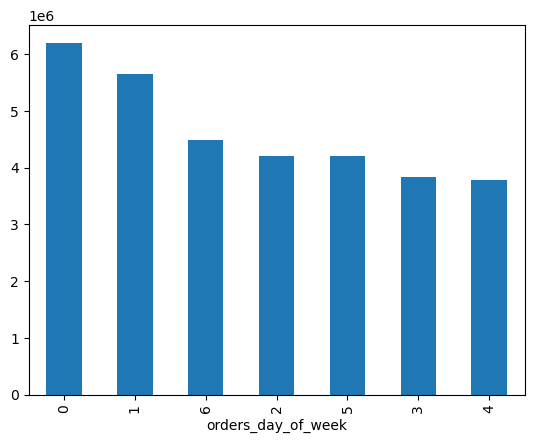

In [4]:
# create bar graph
df_instacart['orders_day_of_week'].value_counts().plot.bar()

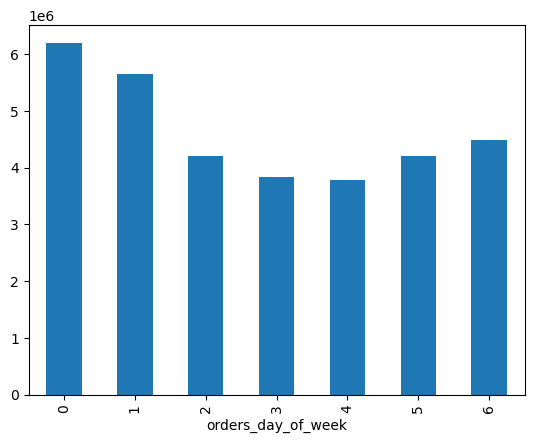

In [5]:
# bar chart by sorted values
bar = df_instacart['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [6]:
# value frequency
df_instacart['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [7]:
# value frequency by sort
df_instacart['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

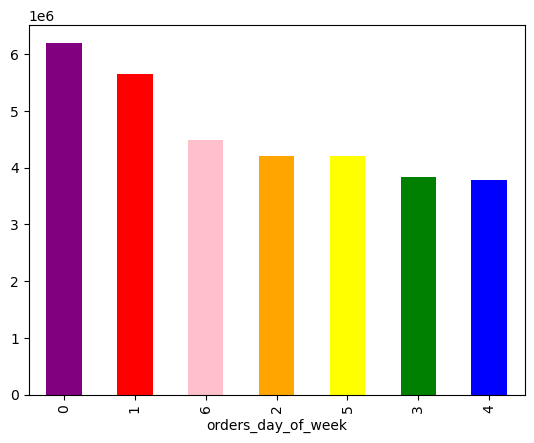

In [8]:
# bar graph with color
bar = df_instacart['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [9]:
# export bar graph
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

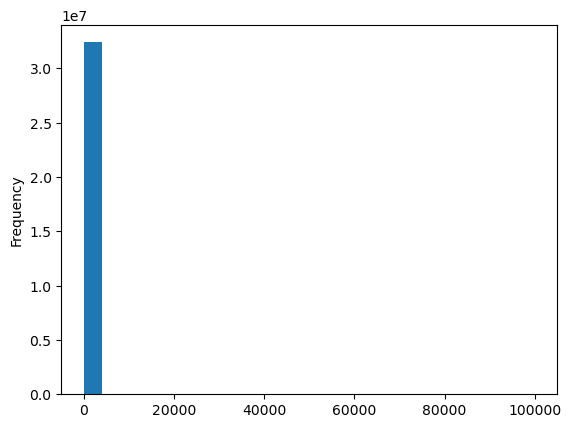

In [10]:
df_instacart['prices'].plot.hist(bins = 25)

In [11]:
# check for mean
df_instacart['prices'].mean()

11.980225638383438

In [12]:
# check for median
df_instacart['prices'].median()

7.4

In [13]:
# check for maximum
df_instacart['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

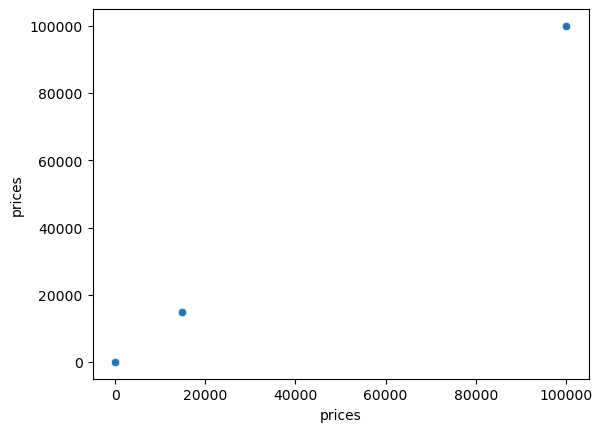

In [14]:
# create a scatter plot
sns.scatterplot(x = 'prices', y = 'prices', data = df_instacart)

In [15]:
df_instacart.loc[df_instacart['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,surname,gender,state,age,date_joined,number_of_dependants,family_status,income
7805,1435153,1519,26,2,11,6.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,1066435,1519,32,3,10,5.0,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,1697208,2409,33,1,19,5.0,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074
20264,965345,3531,27,2,19,8.0,33664,2,0,2 % Reduced Fat Milk,...,Frequent customer,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776
20497,2943740,3793,1,2,9,0.0,21553,3,0,Lowfat 2% Milkfat Cottage Cheese,...,Frequent customer,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,33664,2,1,2 % Reduced Fat Milk,...,Regular customer,nan,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497
32307882,1179092,131671,12,4,9,15.0,33664,1,0,2 % Reduced Fat Milk,...,Regular customer,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490
32310810,1226705,39667,7,2,15,20.0,33664,14,0,2 % Reduced Fat Milk,...,Non-frequent customer,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077
32330048,3000037,95105,2,4,19,22.0,33664,4,0,2 % Reduced Fat Milk,...,Frequent customer,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880


In [16]:
# replace corrupted values with nan value
df_instacart.loc[df_instacart['prices'] > 100, 'prices'] = np.nan

In [17]:
# verify new maximum
df_instacart['prices'].max()

25.0

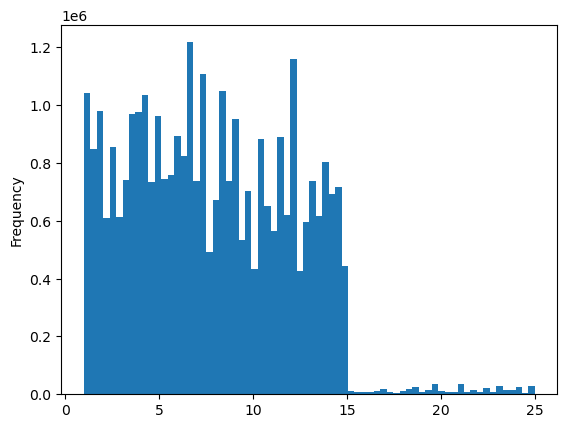

In [18]:
# create new histogram
hist = df_instacart['prices'].plot.hist(bins = 70)

In [19]:
# export histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))

In [20]:
# create a list holding True/False values to the test np.random.rand() <= 0.70
np.random.seed(4)
dev = np.random.rand(len(df_instacart)) <= 0.70

In [21]:
# example of values returned from dev list
dev

array([False,  True, False, ...,  True,  True,  True])

In [22]:
# store 70% of the sample in the dataframe big
big = df_instacart[dev]

In [23]:
#store 30% of the sample in the dataframe small
small = df_instacart[~dev]

In [24]:
# verify combined sample length
len(big) + len(small)

32404859

In [25]:
# create a new dataframe from small sample 
df_2 = small[['orders_day_of_week','prices']]

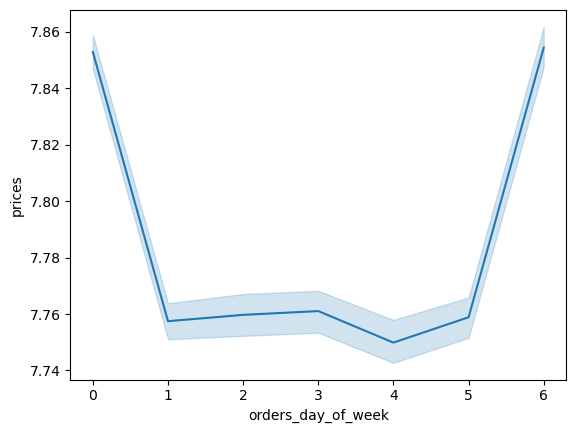

In [26]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [27]:
# export line chart
line.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations','line_orders_dow.png'))

#### 3. Course Task

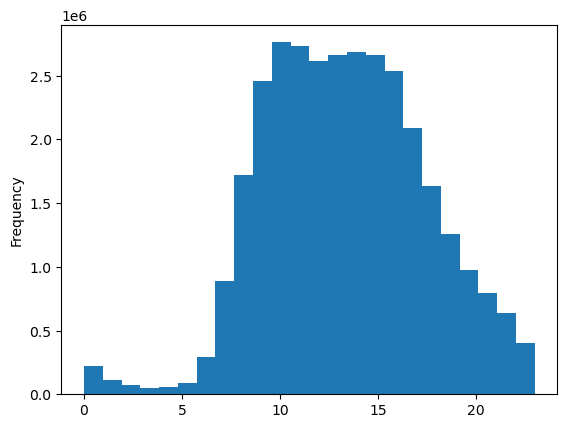

In [28]:
# create histogram for 'order_hour_of_day' column
ord_hr_hist = df_instacart['order_hour_of_day'].plot.hist(bins = 24)

The histogram showcases the order frequency for every hour of the day. We can see that the most active hours for orders are between 9am and 5pm, with the lowest orders being placed between 12am and 6am. Orders start to pile up from 6am to 9pm, and then gradually declines from 5pm onwards.

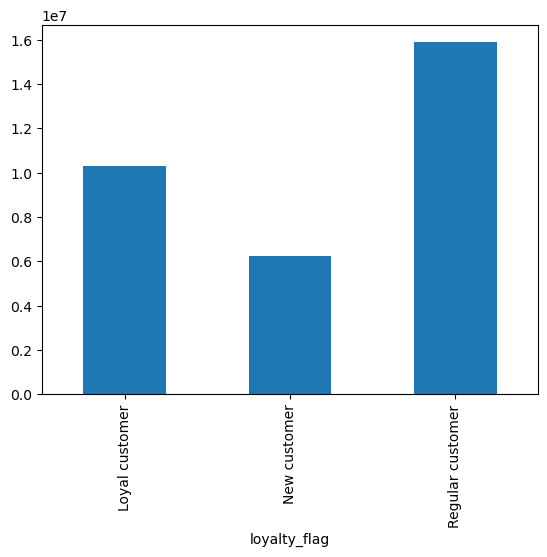

In [29]:
# create bar chart for 'loyalty_flag'
loyalty_flag_bar = df_instacart['loyalty_flag'].value_counts().sort_index().plot.bar()

In [30]:
# check value counts
df_instacart['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

In [31]:
# create a dataframe for 'order_hour_of_day' and 'prices' columns from small sample
df_3 = small[['order_hour_of_day','prices']]

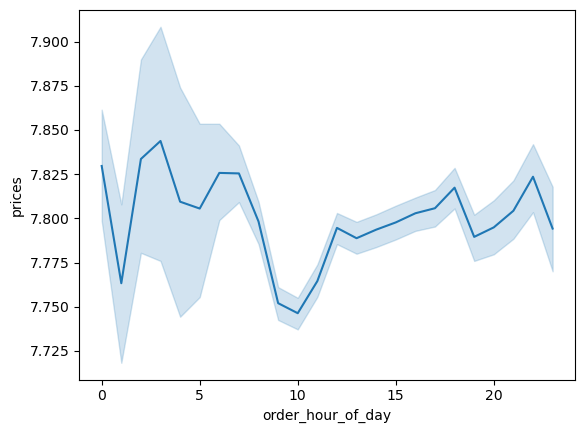

In [32]:
# create line chart new data frame of samples
ords_hrs_prices_line = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

In [33]:
# show column names in dataframe
df_instacart.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'prices_range_loc', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'spending_flag', 'median_orders', 'order_frequency_flag', 'first_name',
       'surname', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'family_status', 'income'],
      dtype='object')

In [34]:
# create data frame for 'age' and 'number_of_dependants' columns from small sample
df_4 = small[['age','number_of_dependants']]

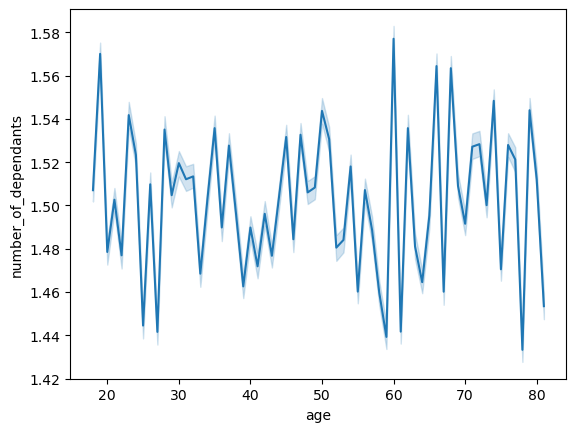

In [35]:
#create line chart for new data frame
age_dependant_line = sns.lineplot(data = df_4, x = 'age', y = 'number_of_dependants')

The results from the linechart shows that there is no correlation between a persons age and number of dependants that a person has.

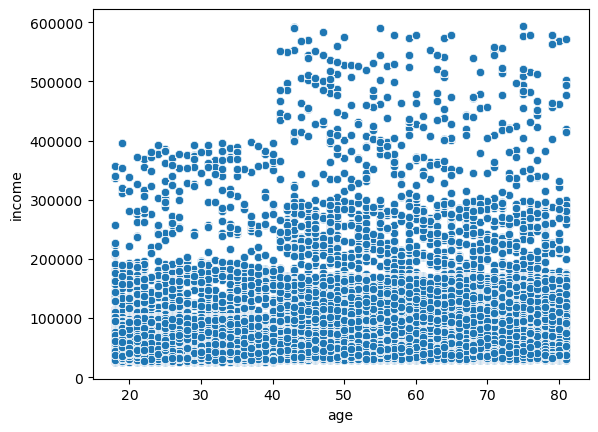

In [36]:
# create a scatterplot chart for 'age' and 'income'
age_income_scplot = sns.scatterplot(x = 'age', y = 'income', data = df_instacart)

The above scatterplot shows that most of the income concentration from all ages range between 0 and 200,000 dollars. The second highest age group cluster is between 40 and 80 years over with an income range between 200,000 and 300,000 dollars. A smaller age group between the of ages 20 and 40 years have an income range between 300,000 to 400,000 dollars. 


In [37]:
# export second histogram
ord_hr_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_hour_histogram.png'))


In [38]:
# export second bar chart
loyalty_flag_bar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations','loyalty_flag_bar.png'))

In [45]:
# export second linechart
ords_hrs_prices_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','orders_hours_prices_line.png'))                     

In [46]:
# export third linechart
age_dependant_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_dependant_line.png'))

In [47]:
# export second Scatterplot
age_income_scplot.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_income_scatterplot.png'))